# **Task 1: Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the two datasets
file_female_path = '/content/API_SP.POP.TOTL.FE.ZS_DS2_en_csv_v2_2296.csv'
file_male_path = '/content/API_SP.POP.TOTL.MA.ZS_DS2_en_csv_v2_2729.csv'

# Read both datasets into pandas dataframes
female_data = pd.read_csv(file_female_path, skiprows = 4, on_bad_lines = 'skip')
male_data = pd.read_csv(file_male_path, skiprows = 4, on_bad_lines = 'skip')

# Check the structure of both datasets to ensure they are loaded correctly
female_data.head(), male_data.head()

(                  Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                Indicator Name     Indicator Code       1960  \
 0  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  50.858849   
 1  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  50.387880   
 2  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  48.083054   
 3  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  50.179683   
 4  Population, female (% of total population)  SP.POP.TOTL.FE.ZS  49.843790   
 
         1961       1962       1963       1964       1965  ...       2015  \
 0  50.850191  50.845065  50.836016  50.826773  50.823381  ...  52.589275   
 1  50.388814  50.391276  50.395656  50.400512  50.405510  ...  50.531940 

# Visualizing the distribution of gender (categorical variable)

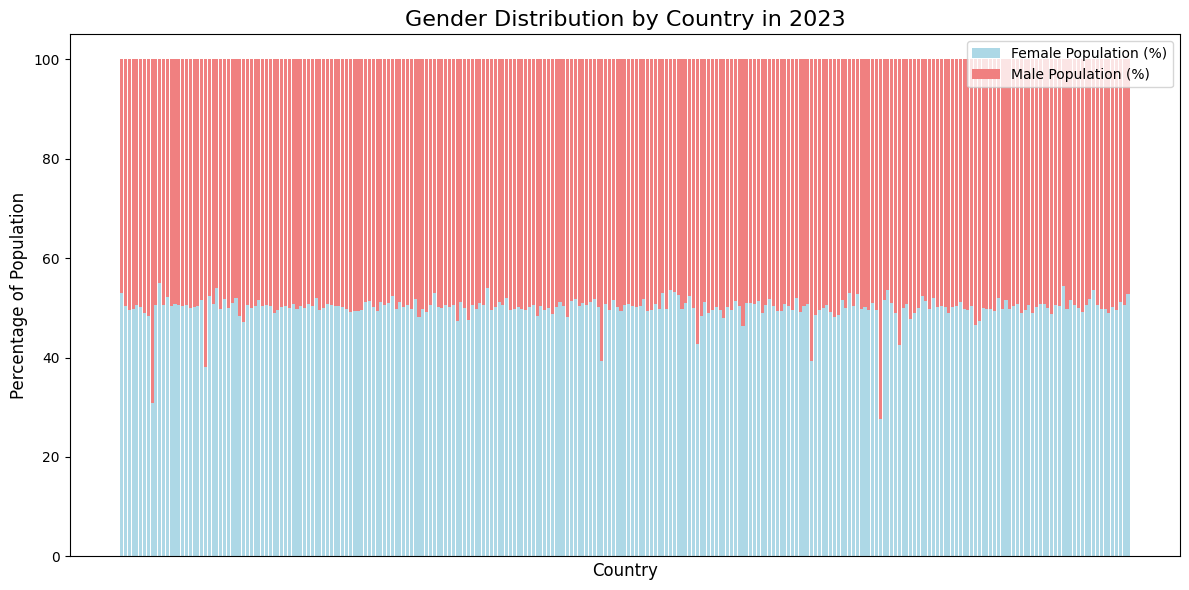

In [46]:
# Filter the data for the year 2023 for both male and female populations
female_2023 = female_data[['Country Name', '2023']].dropna()
male_2023 = male_data[['Country Name', '2023']].dropna()

# Rename the columns for clarity
female_2023.columns = ['Country Name', 'Female Population (%)']
male_2023.columns = ['Country Name', 'Male Population (%)']

# Merge the two datasets on the 'Country Name' to align the male and female data
gender_distribution_2023 = pd.merge(female_2023, male_2023, on = 'Country Name')

# Plotting the distribution of male and female population percentages
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart to display both male and female percentages
ax.bar(gender_distribution_2023['Country Name'], gender_distribution_2023['Female Population (%)'], label = 'Female Population (%)', color = 'lightblue')
ax.bar(gender_distribution_2023['Country Name'], gender_distribution_2023['Male Population (%)'], bottom = gender_distribution_2023['Female Population (%)'], label = 'Male Population (%)', color = 'lightcoral')

# Add labels and title
ax.set_title('Gender Distribution by Country in 2023', fontsize = 16)
ax.set_xlabel('Country', fontsize = 12)
ax.set_ylabel('Percentage of Population', fontsize = 12)
ax.set_xticks([])  # Hide x-axis ticks due to too many countries
ax.legend()

plt.tight_layout()
plt.show()

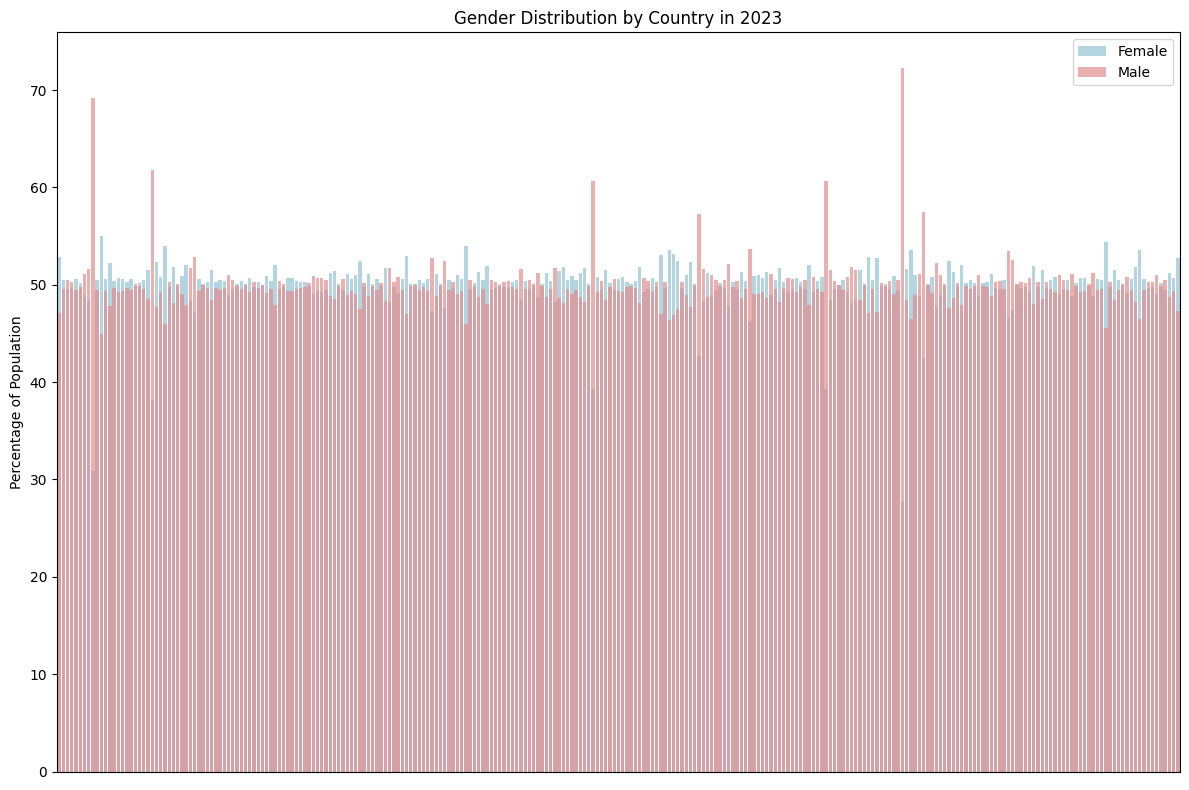

In [47]:
# Setting up different plot (for better visualization)
plt.figure(figsize = (12, 8))

# Create a bar chart for gender distribution
sns.barplot(x = 'Country Name', y = 'Female Population (%)', data = gender_distribution_2023, color = 'lightblue', label = 'Female')
sns.barplot(x = 'Country Name', y = 'Male Population (%)', data = gender_distribution_2023, color = 'lightcoral', label = 'Male', alpha = 0.7)

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Percentage of Population')
plt.title('Gender Distribution by Country in 2023')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis ticks due to too many countries
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

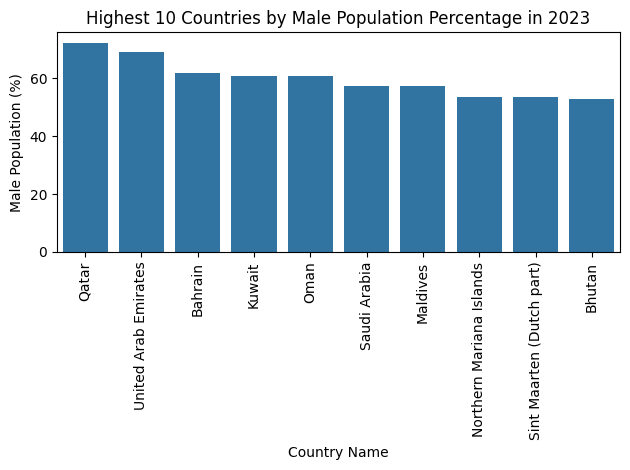

In [48]:
# Select only the top 10 countries by male population (2023) percentage
top_male_countries = gender_distribution_2023.nlargest(10, 'Male Population (%)')

# Plot only these top countries
sns.barplot(x = 'Country Name', y = 'Male Population (%)', data = top_male_countries)
plt.xticks(rotation = 90)
plt.title('Highest 10 Countries by Male Population Percentage in 2023')
plt.tight_layout() # For a better fit
plt.show()

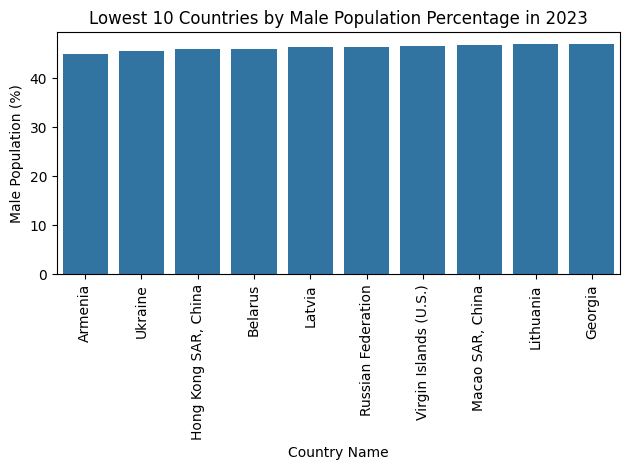

In [49]:
# Select only the lowest 10 countries by male population (2023) percentage
lowest_male_countries = gender_distribution_2023.nsmallest(10, 'Male Population (%)')

# Plot only these lowest countries
sns.barplot(x = 'Country Name', y = 'Male Population (%)', data = lowest_male_countries)
plt.xticks(rotation = 90)  # Rotate country labels for better readability
plt.title('Lowest 10 Countries by Male Population Percentage in 2023')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

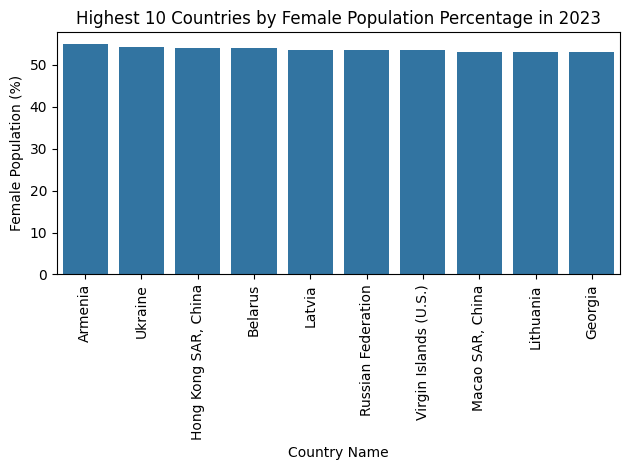

In [50]:
# Select only the top 10 countries by female population (2023) percentage
top_female_countries = gender_distribution_2023.nlargest(10, 'Female Population (%)')

# Plot only these top countries
sns.barplot(x = 'Country Name', y = 'Female Population (%)', data = top_female_countries)
plt.xticks(rotation = 90)
plt.title('Highest 10 Countries by Female Population Percentage in 2023')
plt.tight_layout() # For a better fit
plt.show()

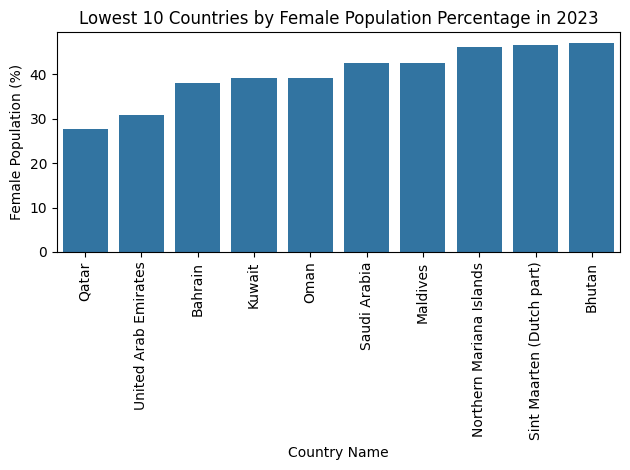

In [51]:
# Select only the lowest 10 countries by female population (2023) percentage
lowest_female_countries = gender_distribution_2023.nsmallest(10, 'Female Population (%)')

# Plot only these lowest countries
sns.barplot(x = 'Country Name', y = 'Female Population (%)', data = lowest_female_countries)
plt.xticks(rotation = 90)  # Rotate country labels for better readability
plt.title('Lowest 10 Countries by Female Population Percentage in 2023')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

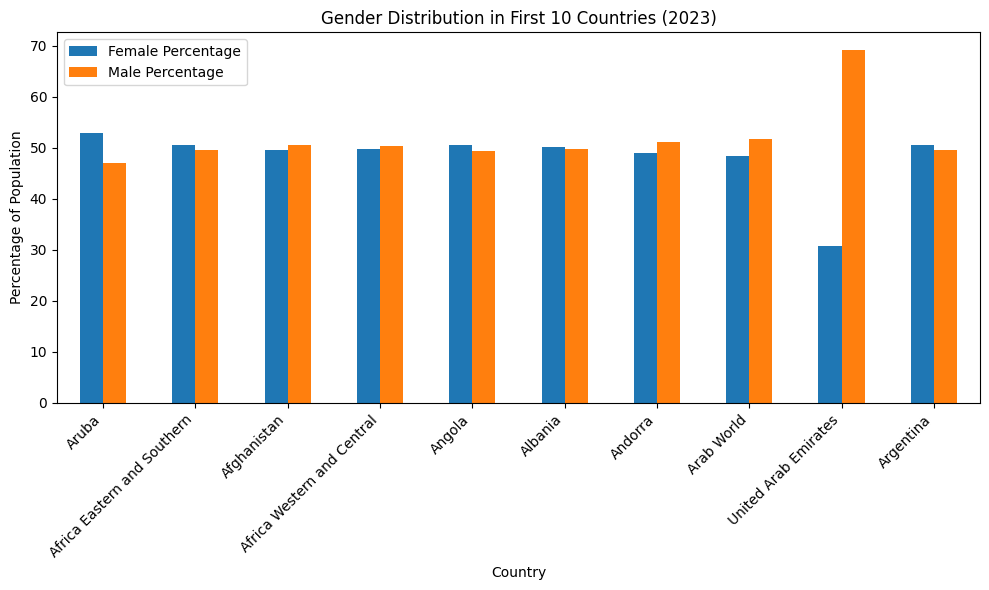

In [61]:
# Visualizing gender distribution using side by side bar charts (for the first 10 countries)

# Creating the dataset to visualize
top10_data = pd.DataFrame({
    'Country': female_2023['Country Name'].head(10),
    'Female Percentage': female_2023['Female Population (%)'].head(10),
    'Male Percentage': male_2023['Male Population (%)'].head(10)
})

# Create a bar chart for gender distribution in selected countries
top10_data.set_index('Country', inplace = True)
top10_data.plot(kind = 'bar', figsize = (10, 6))

# Adding title and labels
plt.title('Gender Distribution in First 10 Countries (2023)')
plt.ylabel('Percentage of Population')
plt.xlabel('Country')

# Show the plot
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

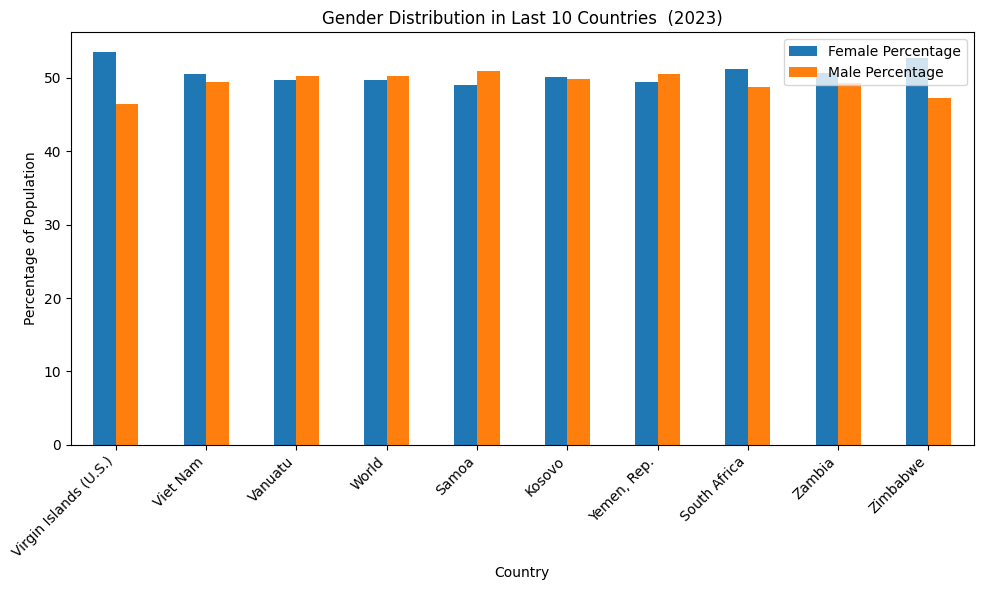

In [60]:
# Visualizing gender distribution using side by side bar charts (for the last 10 countries)

# Creating the dataset to visualize
last10_data = pd.DataFrame({
    'Country': female_2023['Country Name'].tail(10),
    'Female Percentage': female_2023['Female Population (%)'].tail(10),
    'Male Percentage': male_2023['Male Population (%)'].tail(10)
})

# Create a bar chart for gender distribution in selected countries
last10_data.set_index('Country', inplace = True)
last10_data.plot(kind = 'bar', figsize = (10, 6))

# Adding title and labels
plt.title('Gender Distribution in Last 10 Countries  (2023)')
plt.ylabel('Percentage of Population')
plt.xlabel('Country')

# Show the plot
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

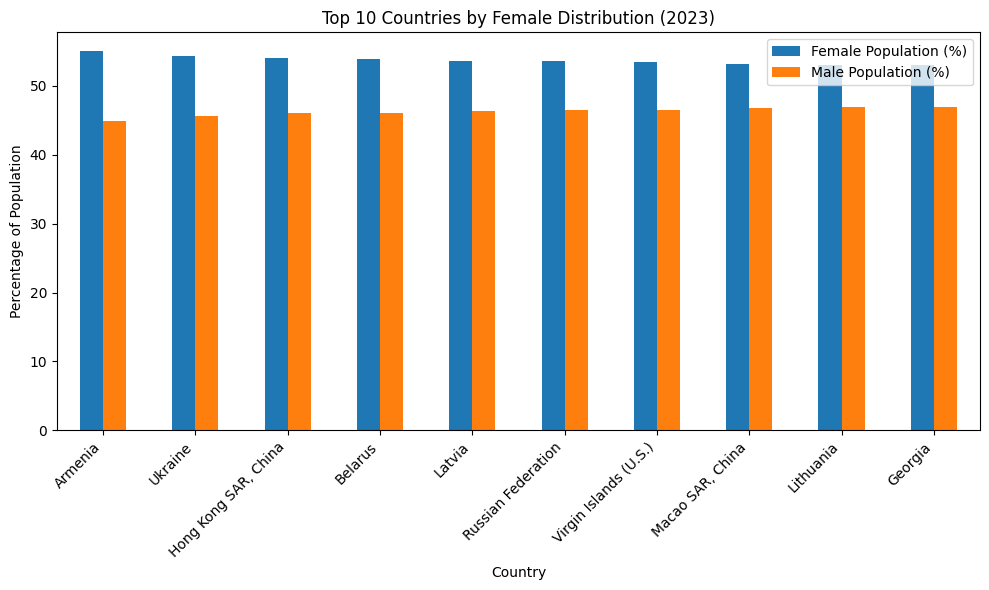

In [54]:
# Creating side by side bar chart for top 10 countries by female distribution

# Sorting the dataset by Female Percentage to get the top 10 countries with the highest female population percentage
top_10_female_distribution = female_2023.sort_values(by = 'Female Population (%)', ascending = False).head(10)

# Matching the Male Percentage for the same top 10 countries
top_10_female_distribution = top_10_female_distribution.merge(male_2023, on = 'Country Name')

# Create a bar chart for the top 10 female distribution countries alongside male
top_10_female_distribution.set_index('Country Name', inplace = True)
top_10_female_distribution.plot(kind = 'bar', figsize = (10, 6))

# Adding title and labels
plt.title('Top 10 Countries by Female Distribution (2023)')
plt.ylabel('Percentage of Population')
plt.xlabel('Country')

# Show the plot
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()


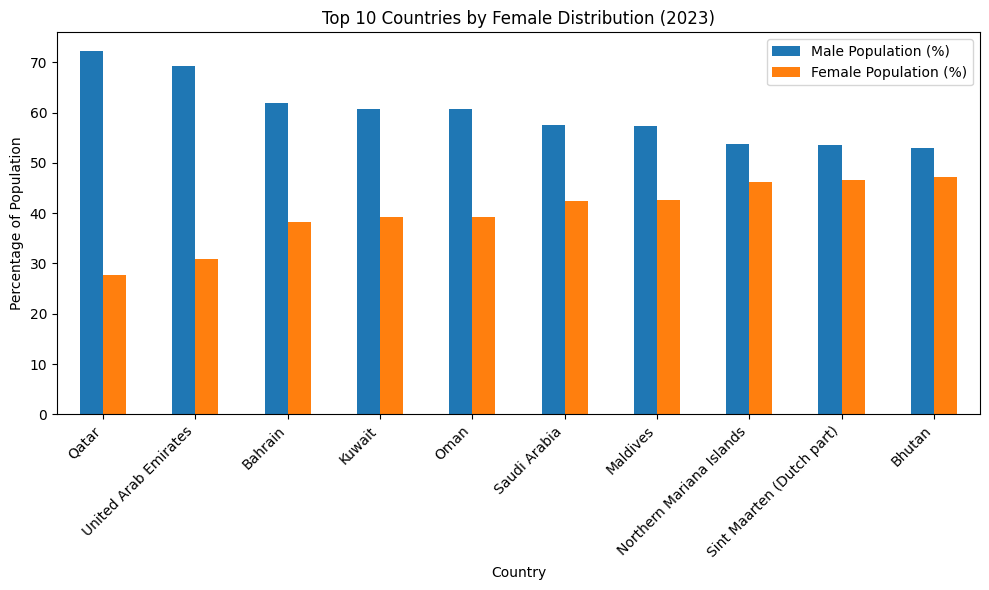

In [55]:
# Creating side by side bar chart for top 10 countries by male distribution

# Sorting the dataset by Male Percentage to get the top 10 countries with the highest male population percentage
top_10_male_distribution = male_2023.sort_values(by = 'Male Population (%)', ascending = False).head(10)

# Matching the Male Percentage for the same top 10 countries
top_10_male_distribution = top_10_male_distribution.merge(female_2023, on = 'Country Name')

# Create a bar chart for the top 10 female distribution countries alongside male
top_10_male_distribution.set_index('Country Name', inplace = True)
top_10_male_distribution.plot(kind = 'bar', figsize = (10, 6))

# Adding title and labels
plt.title('Top 10 Countries by Female Distribution (2023)')
plt.ylabel('Percentage of Population')
plt.xlabel('Country')

# Show the plot
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# Visualizing the distribution of ages (continuous variable)

In [56]:
# Load the files
female_ages_file = '/content/API_SP.POP.1564.FE.ZS_DS2_en_csv_v2_18624.csv'
male_ages_file = '/content/API_SP.POP.1564.MA.ZS_DS2_en_csv_v2_18619.csv'

# Read the files
female_ages = pd.read_csv(female_ages_file, skiprows = 4)  # Skipping the first 4 rows as they contain metadata in World Bank data
male_ages = pd.read_csv(male_ages_file, skiprows = 4)

# Checking the first few rows of both datasets to understand their structure
female_ages.head(), male_ages.head()

(                  Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                       Indicator Name     Indicator Code  \
 0  Population ages 15-64, female (% of female pop...  SP.POP.1564.FE.ZS   
 1  Population ages 15-64, female (% of female pop...  SP.POP.1564.FE.ZS   
 2  Population ages 15-64, female (% of female pop...  SP.POP.1564.FE.ZS   
 3  Population ages 15-64, female (% of female pop...  SP.POP.1564.FE.ZS   
 4  Population ages 15-64, female (% of female pop...  SP.POP.1564.FE.ZS   
 
         1960       1961       1962       1963       1964       1965  ...  \
 0  55.144292  55.318099  55.427749  55.603470  55.833615  56.144667  ...   
 1  53.063729  53.013681  52.945759  52.860169  52.770021  52.677979  ...   
 2  54.236863  54.259

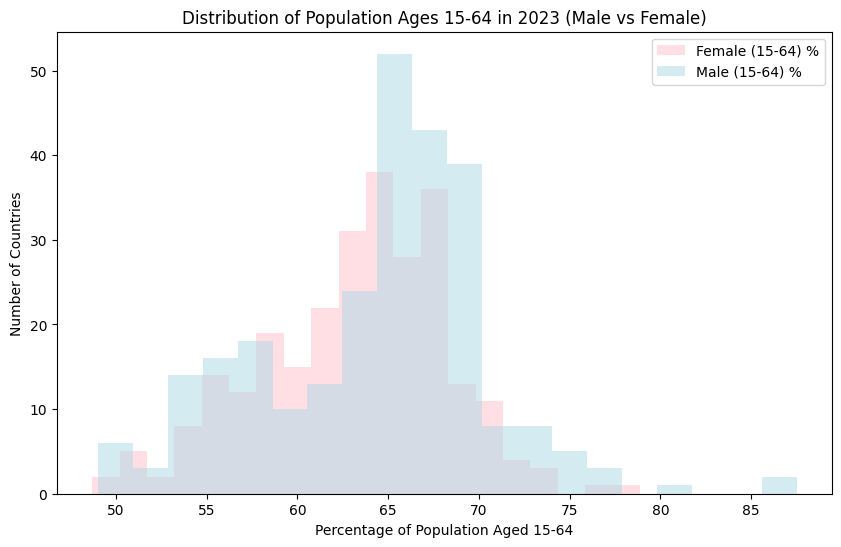

In [57]:
# Extracting the 2023 data for both datasets
age_distribution_female_2023 = female_ages[['Country Name', '2023']].dropna()
age_distribution_male_2023 = male_ages[['Country Name', '2023']].dropna()

# Renaming the columns for clarity
age_distribution_female_2023.columns = ['Country Name', 'Female (15-64) %']
age_distribution_male_2023.columns = ['Country Name', 'Male (15-64) %']

# Merging the datasets
age_distribution_2023 = pd.merge(age_distribution_female_2023, age_distribution_male_2023, on = 'Country Name')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(age_distribution_2023['Female (15-64) %'], bins = 20, alpha = 0.5, label = 'Female (15-64) %', color = 'pink')
plt.hist(age_distribution_2023['Male (15-64) %'], bins = 20, alpha = 0.5, label = 'Male (15-64) %', color = 'lightblue')

plt.title('Distribution of Population Ages 15-64 in 2023 (Male vs Female)')
plt.xlabel('Percentage of Population Aged 15-64')
plt.ylabel('Number of Countries')
plt.legend()

plt.show()

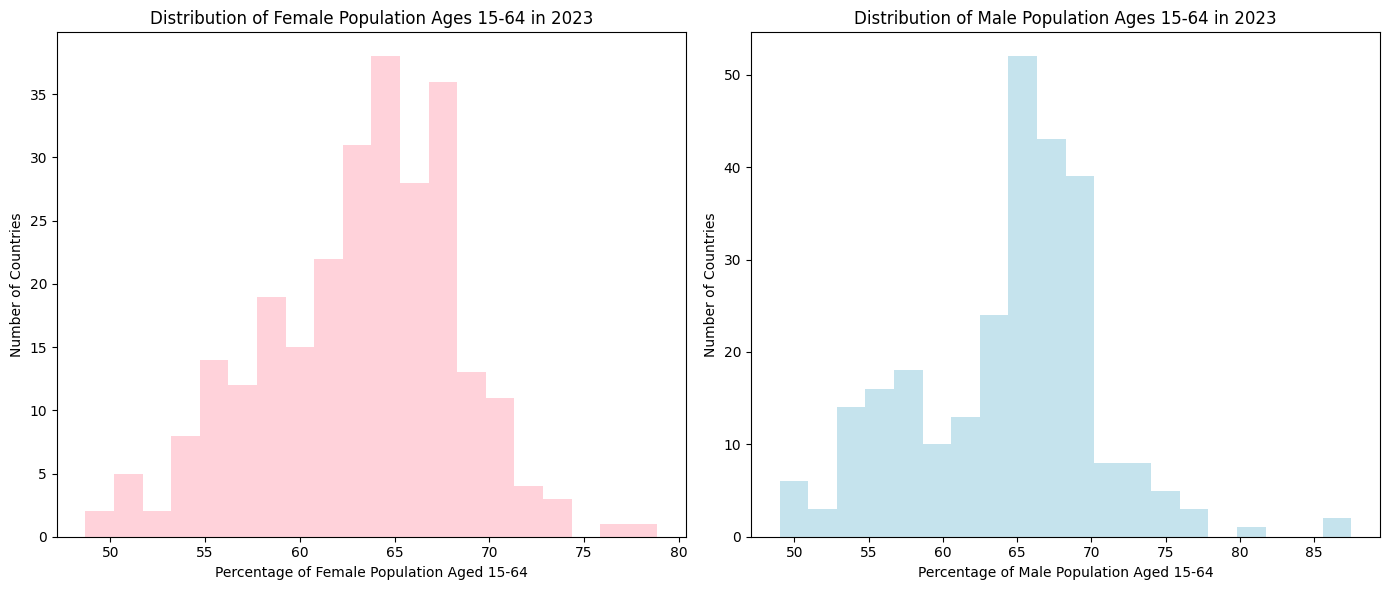

In [62]:
# Plotting separate histograms for better visualization
plt.figure(figsize = (14, 6))

# Female distribution
plt.subplot(1, 2, 1)
plt.hist(age_distribution_2023['Female (15-64) %'], bins = 20, alpha = 0.7, color = 'pink')
plt.title('Distribution of Female Population Ages 15-64 in 2023')
plt.xlabel('Percentage of Female Population Aged 15-64')
plt.ylabel('Number of Countries')

# Male distribution
plt.subplot(1, 2, 2)
plt.hist(age_distribution_2023['Male (15-64) %'], bins = 20, alpha = 0.7, color = 'lightblue')
plt.title('Distribution of Male Population Ages 15-64 in 2023')
plt.xlabel('Percentage of Male Population Aged 15-64')
plt.ylabel('Number of Countries')

plt.tight_layout()
plt.show()

**From the graphs above, it is evident that certain countries exhibit a notably higher proportion of both male and female populations (within the 15-64 age group).**

**Therefore, we will continue exploring the data to find out which of these countries have a higher proportion of both the male and female populations (within the 15-64 age group).**

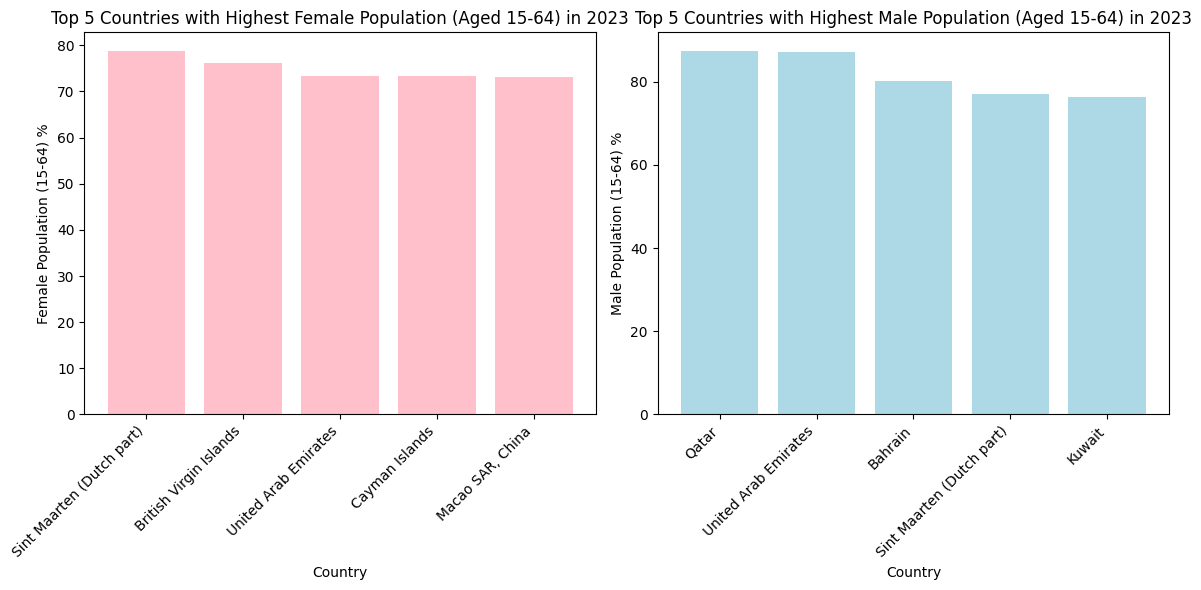

In [63]:
# Identifying the countries with the highest population of male and female aged 15-64 in 2023
top_female_countries = age_distribution_2023[['Country Name', 'Female (15-64) %']].sort_values(by = 'Female (15-64) %', ascending = False).head(5)
top_male_countries = age_distribution_2023[['Country Name', 'Male (15-64) %']].sort_values(by = 'Male (15-64) %', ascending = False).head(5)

# Plotting the top 5 countries for both the male and female populations in a bar chart
plt.figure(figsize = (12, 6))

# Female population bar chart
plt.subplot(1, 2, 1)
plt.bar(top_female_countries['Country Name'], top_female_countries['Female (15-64) %'], color = 'pink')
plt.title('Top 5 Countries with Highest Female Population (Aged 15-64) in 2023')
plt.xlabel('Country')
plt.ylabel('Female Population (15-64) %')
plt.xticks(rotation = 45, ha = 'right')

# Male population bar chart
plt.subplot(1, 2, 2)
plt.bar(top_male_countries['Country Name'], top_male_countries['Male (15-64) %'], color = 'lightblue')
plt.title('Top 5 Countries with Highest Male Population (Aged 15-64) in 2023')
plt.xlabel('Country')
plt.ylabel('Male Population (15-64) %')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

**From the analysis, we can conclude that countries such as Sint Maarten (Dutch part) and the United Arab Emirates rank highly for both genders (aged 15-64), with Qatar leading the male population and Sint Maarten (Dutch part) topping the female population in 2023.**

# Let's try comparing specific regions, we will compare eurpoean countries for this task

In [64]:
# List of European countries
european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
    'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
    'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
    'Sweden', 'Switzerland', 'Turkiye', 'Ukraine', 'United Kingdom'
]

In [65]:
# Filtering the data for European countries
europe_female = female_ages[female_ages['Country Name'].isin(european_countries)].dropna(subset = ['2023'])
europe_male = male_ages[male_ages['Country Name'].isin(european_countries)].dropna(subset = ['2023'])

# Renaming for clarity
europe_female = europe_female[['Country Name', '2023']].rename(columns = {'2023': 'Female (15-64) %'})
europe_male = europe_male[['Country Name', '2023']].rename(columns = {'2023': 'Male (15-64) %'})

# Merging data to compare male and female populations in Europe
europe_data = pd.merge(europe_female, europe_male, on = 'Country Name')

europe_data

,Country Name,Female (15-64) %,Male (15-64) %
0,Albania,66.578711,67.170476
1,Andorra,71.157331,72.869961
2,Armenia,65.956615,65.852474
3,Austria,63.925507,66.966189
4,Azerbaijan,69.941485,68.971807
5,Belgium,62.247265,64.917339
6,Bulgaria,60.780370,66.854105
7,Bosnia and Herzegovina,64.959345,68.308898
8,Belarus,63.360703,68.466078
9,Switzerland,64.143070,66.534983


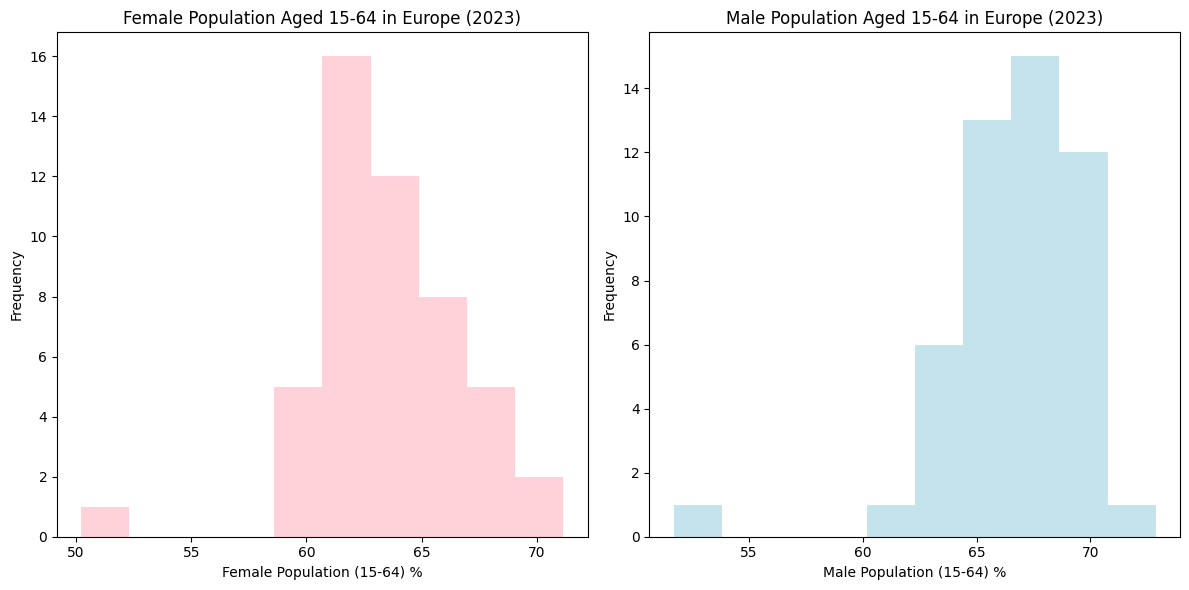

In [66]:
# Plotting the comparison for Europe data
plt.figure(figsize = (12, 6))

# Female population histogram for Europe
plt.subplot(1, 2, 1)
plt.hist(europe_female['Female (15-64) %'], bins = 10, color = 'pink', alpha = 0.7)
plt.title('Female Population Aged 15-64 in Europe (2023)')
plt.xlabel('Female Population (15-64) %')
plt.ylabel('Frequency')

# Male population histogram for Europe
plt.subplot(1, 2, 2)
plt.hist(europe_male['Male (15-64) %'], bins = 10, color = 'lightblue', alpha = 0.7)
plt.title('Male Population Aged 15-64 in Europe (2023)')
plt.xlabel('Male Population (15-64) %')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

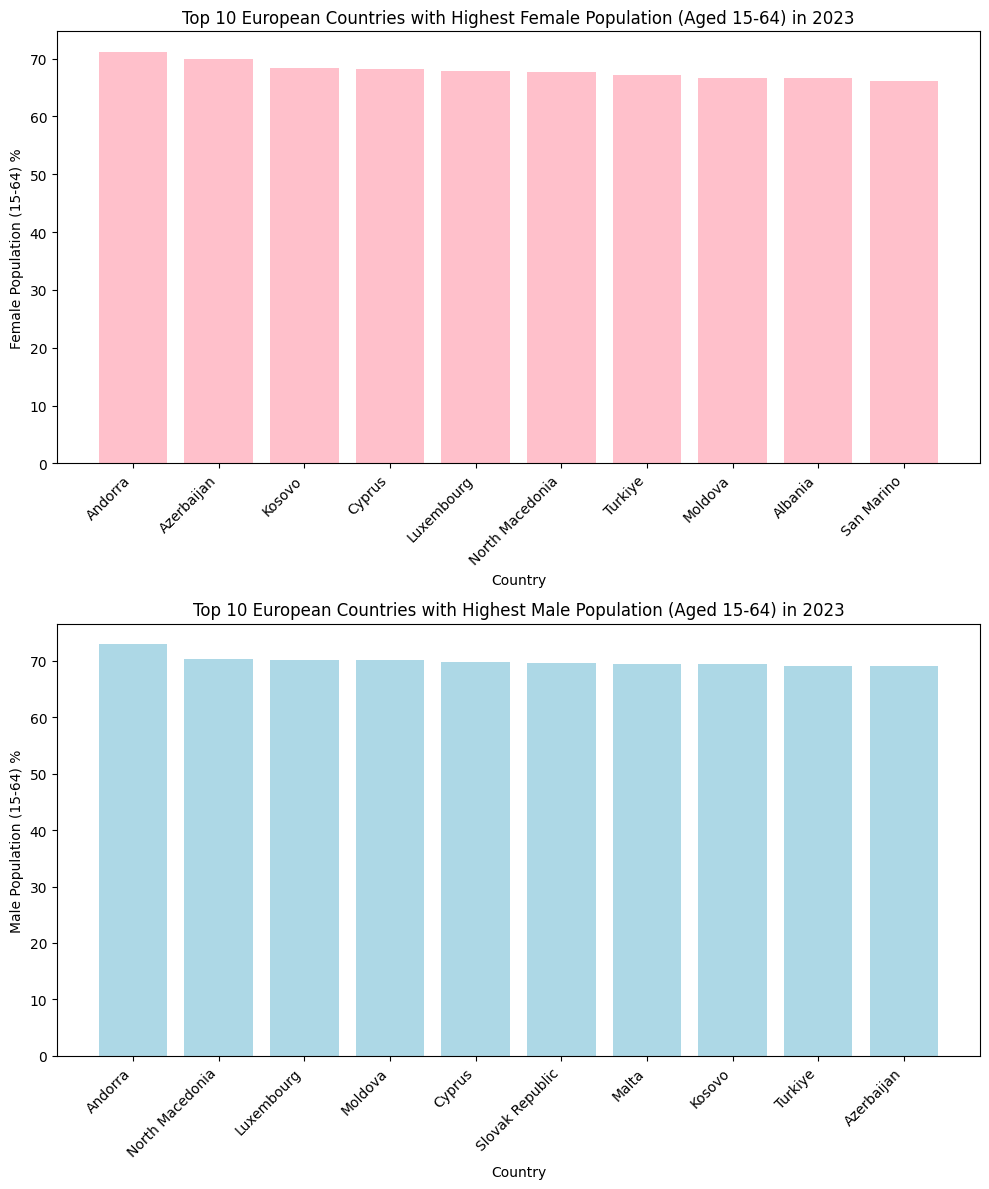

In [67]:
# Sorting the data to find the top 10 countries for male and female populations aged 15-64 in Europe
top10_female_europe = europe_female.sort_values(by = 'Female (15-64) %', ascending = False).head(10)
top10_male_europe = europe_male.sort_values(by = 'Male (15-64) %', ascending = False).head(10)

# Plotting the top 10 countries for both male and female populations in Europe (top and bottom layout)
plt.figure(figsize = (10, 12))

# Female population bar chart for top 10 countries in Europe
plt.subplot(2, 1, 1)
plt.bar(top10_female_europe['Country Name'], top10_female_europe['Female (15-64) %'], color = 'pink')
plt.title('Top 10 European Countries with Highest Female Population (Aged 15-64) in 2023')
plt.xlabel('Country')
plt.ylabel('Female Population (15-64) %')
plt.xticks(rotation = 45, ha = 'right')

# Male population bar chart for top 10 countries in Europe
plt.subplot(2, 1, 2)
plt.bar(top10_male_europe['Country Name'], top10_male_europe['Male (15-64) %'], color = 'lightblue')
plt.title('Top 10 European Countries with Highest Male Population (Aged 15-64) in 2023')
plt.xlabel('Country')
plt.ylabel('Male Population (15-64) %')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

**From the two graphs above, we can conclude that Andorra rank highly for both genders(aged 15-64) in 2023.**